---

#  Using Package `pdpolygonapi`

---


## Package PDPOLYGONAPI provides a python interface to polygon.io REST api and returns ready-to-use Pandas objects.

---

The "pd" in `pdpolygonapi` stands for pandas.  The api/methods described below do *not necessarily* follow the documented polygon.io endpoints, but **rather are focused on providing certain functionalities** that we found useful (see examples below).  Of course, additional api/methods can be added as needed.  This notebook provides several examples of using the methods provided by the pdploygon api.

---

### To begin, install the package:
## `pip install --upgrade pdpolygonapi`

---

In [1]:
# This allows multiple outputs (instead of jus a single output) from each cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### After installation, import the PolygonApi class.
### Then instantiate an instance of the class by passing the name of an environment variable that contains your polygon.io API KEY.

In [2]:
# Import the PolygonApi class constructor:
from pdpolygonapi import PolygonApi    

# Create an instance of the class using an environment variable that contains you APIKEY:
pgon = PolygonApi(envkey='POLYGON_API')   

#### Note that it also possible to pass the API key directly to the constructor (instead of passing the name of an environment variable).  
#### Here is an example that gets the API key from a local file and passes it directly:

```python
with open('polygonapi_key.txt', 'r') as f:
    myApiKey = f.read().replace('\n\,'')
pgon = PolygonApi(apikey=myApiKey)

```

It is ***not*** advisable (i.e. not secure) to hard-code or otherwise place your API key in your code, nor in a file that is part of a repository stored elsewhere (even if that repository is not public).


Now that we have an instance of the PolygonApi, we can all it's various methods:

| method | description |
| :-- | :-- |
| `fetch_ohlcvdf()`| returns an Open , High, Low, Close, Volume DataFrame, index by Datetime. |
| `fetch_quotes()` | returns Bid/Ask and BidSize/AskSize |
| `fetch_options_chain()`| returns all options for a given underlying and range of expiration dates. |

All of the above have various kwargs to modify their behavior, as shown in the examples below:

In [3]:
print("example: get 6 month's worth of daily data:")
ticker = 'SPY'
start  = '2023-01-01'
end    = '2023-06-30'
span   = 'day'

df = pgon.fetch_ohlcvdf(ticker,start,end,span)

example: get 6 month's worth of daily data:
dtm= 2023-06-30 23:59:59.099999
dtm= 2023-01-01 00:00:00
requesting data ...


In [4]:
df

,Open,High,Low,Close,Volume
SPY,,,,,
2023-01-03,384.37,386.43,377.8310,380.82,74850731.0
2023-01-04,383.18,385.88,380.0000,383.76,85934098.0
2023-01-05,381.72,381.84,378.7600,379.38,76275354.0
2023-01-06,382.61,389.25,379.4127,388.08,104052662.0
2023-01-09,390.37,393.70,387.6700,387.86,73978071.0
...,...,...,...,...,...
2023-06-26,432.62,434.61,431.1900,431.44,72723560.0
2023-06-27,432.35,436.81,431.8800,436.17,73064702.0
2023-06-28,435.05,437.44,434.4100,436.39,75635976.0


plot the data:


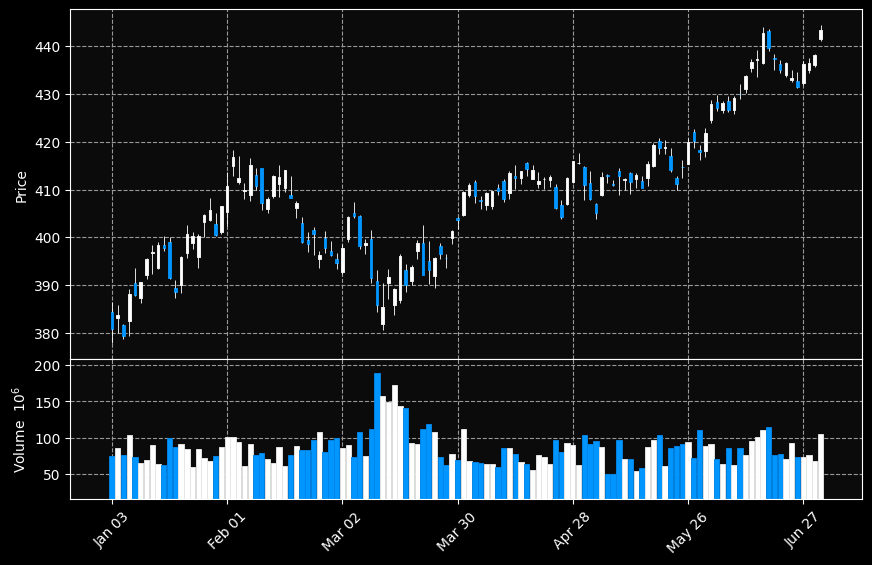

In [5]:
print('plot the data:')
import mplfinance as mpf

mpf.plot(df,type='candle',volume=True,style='nightclouds',figsize=(11,7))

In [6]:
print("example: get 3 days of hourly data:")
ticker = 'O:SPY230818C00450000'
start  = '2023-08-09'
end    = '2023-08-11'
span   = 'hour'
df = pgon.fetch_ohlcvdf(ticker,start,end,span)

example: get 3 days of hourly data:
dtm= 2023-08-11 23:59:59.099999
dtm= 2023-08-09 00:00:00
requesting data ...


In [7]:
df

,Open,High,Low,Close,Volume
2023-08-09 10:00:00,3.30,3.48,2.86,2.88,1246
2023-08-09 11:00:00,2.88,3.02,2.20,2.31,6849
2023-08-09 12:00:00,2.30,2.64,2.28,2.56,2228
2023-08-09 13:00:00,2.50,3.08,2.46,2.91,4757
2023-08-09 14:00:00,2.90,3.51,2.87,3.21,3968
2023-08-09 15:00:00,3.20,3.22,2.24,2.25,5242
2023-08-10 10:00:00,4.39,4.64,3.18,3.50,5725
2023-08-10 11:00:00,3.50,3.55,2.44,2.68,8940
2023-08-10 12:00:00,2.65,2.79,2.12,2.16,4547
2023-08-10 13:00:00,2.17,2.39,1.81,1.84,3863


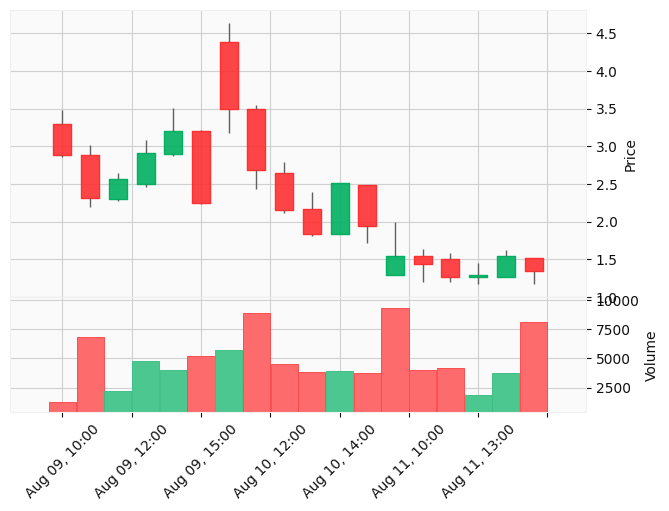

In [8]:
mpf.plot(df,type='candle',volume=True,style='yahoo')

In [9]:
print('Get all SPY Options with Expiration Dates in July 2023:')

opchain = pgon.fetch_options_chain('SPY','2023-07-01','2023-07-30')

Get all SPY Options with Expiration Dates in July 2023:
Requesting data .......

In [10]:
print('\nThe OptionsChain object returned by `fetch_options_chain()` has several usefule properties:\n\n'+
      '.underlying    is a string ticker symbol of the underyling\n'+
      '.tickers       is a DataFrame of all options tickers indexed by expiration date, strike, and put/call.\n'
      '.expirations   is a series of expiration dates indexed by expiration date.\n'+
      '.strikes       is a dictionary keyed by expiration date,\n'+
      '               and for each expiration date it contains a series of strikes.\n\n')
    


The OptionsChain object returned by `fetch_options_chain()` has several usefule properties:

.underlying    is a string ticker symbol of the underyling
.tickers       is a DataFrame of all options tickers indexed by expiration date, strike, and put/call.
.expirations   is a series of expiration dates indexed by expiration date.
.strikes       is a dictionary keyed by expiration date,
               and for each expiration date it contains a series of strikes.




In [11]:
print('\n.underlying contains the underlying ticker:\n')
print('The underlying for this OptionsChain is "'+opchain.underlying+'"')


.underlying contains the underlying ticker:

The underlying for this OptionsChain is "SPY"


In [12]:
print('\n.tickers is a series containing all of the options\n'+
      'indexed by expiration date, strike, and put/call:\n')
type(opchain.tickers)
opchain.tickers


.tickers is a series containing all of the options
indexed by expiration date, strike, and put/call:



pandas.core.series.Series

Expiration  Strike  Type
2023-07-03  390.0   call    O:SPY230703C00390000
                    put     O:SPY230703P00390000
            400.0   call    O:SPY230703C00400000
                    put     O:SPY230703P00400000
            402.0   call    O:SPY230703C00402000
                                    ...         
2023-07-28  510.0   put     O:SPY230728P00510000
            515.0   call    O:SPY230728C00515000
                    put     O:SPY230728P00515000
            520.0   call    O:SPY230728C00520000
                    put     O:SPY230728P00520000
Name: Ticker, Length: 4680, dtype: object

In [13]:
print('.expirations is a series of expiration dates indexed by expiration date:')

opchain.expirations

.expirations is a series of expiration dates indexed by expiration date:


2023-07-03    2023-07-03
2023-07-05    2023-07-05
2023-07-06    2023-07-06
2023-07-07    2023-07-07
2023-07-10    2023-07-10
2023-07-11    2023-07-11
2023-07-12    2023-07-12
2023-07-13    2023-07-13
2023-07-14    2023-07-14
2023-07-17    2023-07-17
2023-07-18    2023-07-18
2023-07-19    2023-07-19
2023-07-20    2023-07-20
2023-07-21    2023-07-21
2023-07-24    2023-07-24
2023-07-25    2023-07-25
2023-07-26    2023-07-26
2023-07-27    2023-07-27
2023-07-28    2023-07-28
Name: Expiration, dtype: object

In [14]:
print('\n.strikes is a dict, keyed by expiration date,\n'+
      'and containing a series of strike prices for each expiration date:\n')

opchain.strikes.keys()

opchain.strikes['2023-07-14']
opchain.strikes['2023-07-21']


.strikes is a dict, keyed by expiration date,
and containing a series of strike prices for each expiration date:



dict_keys(['2023-07-03', '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28'])

Strike
275.0    275.0
280.0    280.0
285.0    285.0
290.0    290.0
295.0    295.0
         ...  
499.0    499.0
500.0    500.0
505.0    505.0
510.0    510.0
520.0    520.0
Name: Strike, Length: 150, dtype: float64

Strike
150.0    150.0
155.0    155.0
160.0    160.0
165.0    165.0
170.0    170.0
         ...  
630.0    630.0
635.0    635.0
640.0    640.0
645.0    645.0
650.0    650.0
Name: Strike, Length: 213, dtype: float64

---

```
The fact that the expriations series is indexed by expiration date, 
and each strike series is index by strike, 
allows one to use the index of these series to isolate a range of expiration dates and/or strikes 
using values that are not necessarily in the data.  
See examples below.
```
      
---

### In the following example, for a specific expiration date, we isolate the options tickers for the "relevant" strike prices, by limiting ourselves to 5 strikes above the highest high, and 5 strikes below the lowest low, based on underlying price data for the 30 days prior to expiration:

---

In [15]:
expiration_date = '2023-07-21'
print('\nThere are',len(opchain.strikes[expiration_date]),'strikes for expiration',expiration_date,'\n')


There are 213 strikes for expiration 2023-07-21 



In [16]:
print('\nGet price history for the underlying for 30 days prior to',expiration_date,'expiration:\n')

spydf = pgon.fetch_ohlcvdf('SPY',start='2023-06-21',end=expiration_date)
spydf.head(2)
spydf.tail(2)

highest_high = max(spydf['High'])
lowest_low   = min(spydf['Low'])

print('\n-----------------------------------------------\n')
print('highest_high=',highest_high,'  lowest_low=',lowest_low)


Get price history for the underlying for 30 days prior to 2023-07-21 expiration:

dtm= 2023-07-21 23:59:59.099999
dtm= 2023-06-21 00:00:00
requesting data ...


,Open,High,Low,Close,Volume
SPY,,,,,
2023-06-21,436.16,436.99,434.33,434.94,76840751.0
2023-06-22,433.95,436.62,433.60,436.51,70510175.0


,Open,High,Low,Close,Volume
SPY,,,,,
2023-07-20,454.17,455.100,451.44,452.18,70575142.0
2023-07-21,453.96,454.165,452.17,452.18,70940618.0



-----------------------------------------------

highest_high= 456.43   lowest_low= 431.19


In [17]:
print('\n-----------------------------------------------\n')
print('highest_high=',highest_high,'  lowest_low=',lowest_low)



high_strike = opchain.strikes[expiration_date].loc[highest_high:].iloc[4]
print('\n5 strikes above the highest high is:',high_strike)



low_strike = opchain.strikes[expiration_date].loc[:lowest_low].iloc[-5]
print('\n5 strikes below the lowest low is:',low_strike)


relevant_strikes = opchain.strikes[expiration_date].loc[low_strike:high_strike]
                       
print('\nThus we need only',
      len(relevant_strikes),
      'strikes\n'+
      '(rather than',
      len(opchain.strikes[expiration_date]),
      ')')

print('\nThe relevant strikes are:\n',relevant_strikes.values)


-----------------------------------------------

highest_high= 456.43   lowest_low= 431.19

5 strikes above the highest high is: 461.0

5 strikes below the lowest low is: 427.0

Thus we need only 35 strikes
(rather than 213 )

The relevant strikes are:
 [427. 428. 429. 430. 431. 432. 433. 434. 435. 436. 437. 438. 439. 440.
 441. 442. 443. 444. 445. 446. 447. 448. 449. 450. 451. 452. 453. 454.
 455. 456. 457. 458. 459. 460. 461.]


---

#### Now let's get all the tickers for these relevant strikes:

---

In [18]:
relevant_tickers = opchain.tickers.loc[(expiration_date,low_strike):(expiration_date,high_strike)]

print('\nNote: We found',len(relevant_strikes),'strikes,\n\n'+
      'and with a Put and Call for each, we have',len(relevant_tickers.values),'options tickers:\n\n',
      relevant_tickers.values)


Note: We found 35 strikes,

and with a Put and Call for each, we have 70 options tickers:

 ['O:SPY230721C00427000' 'O:SPY230721P00427000' 'O:SPY230721C00428000'
 'O:SPY230721P00428000' 'O:SPY230721C00429000' 'O:SPY230721P00429000'
 'O:SPY230721C00430000' 'O:SPY230721P00430000' 'O:SPY230721C00431000'
 'O:SPY230721P00431000' 'O:SPY230721C00432000' 'O:SPY230721P00432000'
 'O:SPY230721C00433000' 'O:SPY230721P00433000' 'O:SPY230721C00434000'
 'O:SPY230721P00434000' 'O:SPY230721C00435000' 'O:SPY230721P00435000'
 'O:SPY230721C00436000' 'O:SPY230721P00436000' 'O:SPY230721C00437000'
 'O:SPY230721P00437000' 'O:SPY230721C00438000' 'O:SPY230721P00438000'
 'O:SPY230721C00439000' 'O:SPY230721P00439000' 'O:SPY230721C00440000'
 'O:SPY230721P00440000' 'O:SPY230721C00441000' 'O:SPY230721P00441000'
 'O:SPY230721C00442000' 'O:SPY230721P00442000' 'O:SPY230721C00443000'
 'O:SPY230721P00443000' 'O:SPY230721C00444000' 'O:SPY230721P00444000'
 'O:SPY230721C00445000' 'O:SPY230721P00445000' 'O:SPY230721C0044600

### Now, suppose we want to get 30 days of quotes (bid/ask) date for each of those options tickers 
#### (for the 30 days leading up to expiration).
#### The code would look something like this:

---

```python
quotes = {}
for optkr in relevant_tickers:
    # first get daily data for this ticker, so that we know which days the option traded:
    daily = pgon.fetch_ohlcv(optkr,'2023-06-21','2023-07-21')
    
    # now loop through each date and get the quotes:
    for date in daily.index:
        key = optkr+' '+str(date.date())
        quotes[key] = pgon.fetch_quotes(optkr,str(date.date()))

```


### In the following example we limit ourselves to the first two tickers on the list, and to the first two dates, just for the sake of a short example:

In [19]:
quotes = {}
for optkr in relevant_tickers.values[0:2]:
    # first get daily data for this ticker, so that we know which days the option traded:
    daily = pgon.fetch_ohlcvdf(optkr,'2023-06-21','2023-07-21')

    # now loop through each date and get the quotes:
    for date in daily.index[0:2]:
        key = optkr+' '+str(date.date())
        print('key=',key)
        quotes[key] = pgon.fetch_quotes(optkr,str(date.date()))

dtm= 2023-07-21 23:59:59.099999
dtm= 2023-06-21 00:00:00
requesting data ...
key= O:SPY230721C00427000 2023-06-21
Requesting quote data for "O:SPY230721C00427000"
 from 2023-06-21 13:30:00  to  2023-06-21 20:00:00 UTC
response status: OK
received 27109 quotes so far ...
resampling to 1S intervals ...
returning 11061 quotes.
key= O:SPY230721C00427000 2023-06-22
Requesting quote data for "O:SPY230721C00427000"
 from 2023-06-22 13:30:00  to  2023-06-22 20:00:00 UTC
response status: OK
received 42912 quotes so far ...
resampling to 1S intervals ...
returning 12249 quotes.
dtm= 2023-07-21 23:59:59.099999
dtm= 2023-06-21 00:00:00
requesting data ...
key= O:SPY230721P00427000 2023-06-21
Requesting quote data for "O:SPY230721P00427000"
 from 2023-06-21 13:30:00  to  2023-06-21 20:00:00 UTC
response status: OK
received 50000 quotes so far ...
getting next_url ... response status: OK  received 76238 quotes.
resampling to 1S intervals ...
returning 16414 quotes.
key= O:SPY230721P00427000 2023-06-

In [20]:
print('\n\nThe Bid and Ask values are the AVERAGE Bid/Ask for the specified ONE SECOND INTERVAL.\n\n'+
      'The  Count  is how many Bid/Ask values went into the average for each one second interval.\n\n'+
      'The Sizes specified for Asize (Ask Size) and Bsize (Bid Size) show the distribution of\n'+
      'bid/ask sizes within each one second interval, in terms of Average, Median, High and Low\n')

for key in quotes.keys():
    print('\n------------------------------------------------\n'+
          'Ticker and Date:',key)
    quotes[key]



The Bid and Ask values are the AVERAGE Bid/Ask for the specified ONE SECOND INTERVAL.

The  Count  is how many Bid/Ask values went into the average for each one second interval.

The Sizes specified for Asize (Ask Size) and Bsize (Bid Size) show the distribution of
bid/ask sizes within each one second interval, in terms of Average, Median, High and Low


------------------------------------------------
Ticker and Date: O:SPY230721C00427000 2023-06-21


,Ask,AsizeA,AsizeM,AsizeH,AsizeL,Bid,BsizeA,BsizeM,BsizeH,BsizeL,Count
Timestamp,,,,,,,,,,,
2023-06-21 09:30:00,14.21,14,14,30,1,13.20,10,10,20,1,10
2023-06-21 09:30:01,13.99,48,8,128,3,13.24,48,10,127,3,8
2023-06-21 09:30:02,13.88,246,200,391,116,13.38,248,225,424,100,6
2023-06-21 09:30:03,13.88,183,200,224,124,13.38,187,200,224,138,3
2023-06-21 09:30:04,14.11,26,20,124,1,12.95,27,10,138,5,9
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 15:59:54,12.72,822,822,1314,330,12.37,976,976,1752,200,2
2023-06-21 15:59:55,12.71,1750,1750,1750,1750,12.37,1520,1520,1520,1520,1
2023-06-21 15:59:56,12.68,600,600,600,600,12.37,484,484,484,484,1



------------------------------------------------
Ticker and Date: O:SPY230721C00427000 2023-06-22


,Ask,AsizeA,AsizeM,AsizeH,AsizeL,Bid,BsizeA,BsizeM,BsizeH,BsizeL,Count
Timestamp,,,,,,,,,,,
2023-06-22 09:30:00,12.18,29,10,100,1,11.19,22,10,100,1,9
2023-06-22 09:30:01,11.99,137,116,216,100,11.50,135,114,213,100,4
2023-06-22 09:30:02,11.89,139,108,250,10,11.61,140,108,250,18,7
2023-06-22 09:30:03,11.87,180,200,200,119,11.63,181,200,200,124,4
2023-06-22 09:30:04,11.87,203,203,203,203,11.63,206,206,206,206,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 15:59:55,13.60,506,506,506,506,13.22,60,60,60,60,1
2023-06-22 15:59:56,13.60,464,464,464,463,13.27,462,462,462,462,2
2023-06-22 15:59:57,13.64,287,230,745,59,13.27,373,400,750,118,8



------------------------------------------------
Ticker and Date: O:SPY230721P00427000 2023-06-21


,Ask,AsizeA,AsizeM,AsizeH,AsizeL,Bid,BsizeA,BsizeM,BsizeH,BsizeL,Count
Timestamp,,,,,,,,,,,
2023-06-21 09:30:00,2.61,273,113,1200,24,2.54,267,97,1200,32,6
2023-06-21 09:30:01,2.61,80,93,111,18,2.59,106,82,293,62,8
2023-06-21 09:30:02,2.60,82,88,101,62,2.58,175,184,293,62,8
2023-06-21 09:30:03,2.59,174,170,270,62,2.58,213,262,301,62,5
2023-06-21 09:30:04,2.60,95,93,101,93,2.59,83,93,97,48,4
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 15:59:55,2.70,68,66,155,6,2.68,196,200,350,57,15
2023-06-21 15:59:56,2.70,194,168,337,84,2.68,465,694,715,23,5
2023-06-21 15:59:57,2.70,273,264,470,57,2.68,518,362,1186,64,21



------------------------------------------------
Ticker and Date: O:SPY230721P00427000 2023-06-22


,Ask,AsizeA,AsizeM,AsizeH,AsizeL,Bid,BsizeA,BsizeM,BsizeH,BsizeL,Count
Timestamp,,,,,,,,,,,
2023-06-22 09:30:00,3.04,29,20,57,10,3.00,32,20,57,20,3
2023-06-22 09:30:01,3.03,62,64,85,17,3.01,68,57,111,57,5
2023-06-22 09:30:02,3.02,118,118,128,109,3.00,92,92,92,92,2
2023-06-22 09:30:03,3.02,214,257,292,92,3.00,80,92,92,57,3
2023-06-22 09:30:04,3.02,172,192,292,13,3.00,221,264,264,92,4
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22 15:59:55,2.18,200,200,381,65,2.17,222,267,279,39,11
2023-06-22 15:59:56,2.17,351,238,801,76,2.16,288,286,594,100,20
2023-06-22 15:59:57,2.17,226,200,558,15,2.16,168,150,504,30,24


---

### Here we see how we can save the quote data in compressed csv files, and later retrieve it:

---

In [21]:
print('\nSave the quotes DataFrames as gzipped csv files:\n')

for key in quotes.keys():
    file_name = key.replace(' ','.')+'.csv'
    quotes[key].to_csv(file_name+'.gz')  # .gz extension automatically gets compressed
    
%ls -l *.csv.gz


Save the quotes DataFrames as gzipped csv files:

-rw-r--r-- 1 dino dino 169331 Aug 14 21:26 O:SPY230721C00427000.2023-06-21.csv.gz
-rw-r--r-- 1 dino dino 209809 Aug 14 21:26 O:SPY230721C00427000.2023-06-22.csv.gz
-rw-r--r-- 1 dino dino 266704 Aug 14 21:26 O:SPY230721P00427000.2023-06-21.csv.gz
-rw-r--r-- 1 dino dino 238098 Aug 14 21:26 O:SPY230721P00427000.2023-06-22.csv.gz


In [22]:
print('\nRead the quotes from the gzipped csv files:\n')
      

import pandas as pd

reread_quotes = {}

for key in quotes.keys():
    file_name = key.replace(' ','.')+'.csv'
    reread_quotes[key] = pd.read_csv(file_name+'.gz',index_col='Timestamp',parse_dates=True)

print('\nDemonstrate that the re-read quote DatFrames are identical to the originals:\n')
    
for key in quotes.keys():
    print(key,' DataFrames are identical:',
          all(quotes[key] == reread_quotes[key])
         )


Read the quotes from the gzipped csv files:


Demonstrate that the re-read quote DatFrames are identical to the originals:

O:SPY230721C00427000 2023-06-21  DataFrames are identical: True
O:SPY230721C00427000 2023-06-22  DataFrames are identical: True
O:SPY230721P00427000 2023-06-21  DataFrames are identical: True
O:SPY230721P00427000 2023-06-22  DataFrames are identical: True
